In [1]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.stats import skew
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
data = pd.read_csv('data.csv')
display(data.head())
display(data.describe())

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


### DATA CLEANING

In [3]:
# Checking for missing values
print("Missing values values:", data.isnull().sum().unique())

# Checking for duplicates
print("Number of duplicated rows:", data.duplicated().sum())

# Data shape
print("Dataframe shape:", data.shape)

Missing values values: [0]
Number of duplicated rows: 0
Dataframe shape: (6819, 96)


In [4]:
print(data.columns)

# We can see that some columns have a leading space in their name

# Removing leading spaces

data.columns = data.columns.str.strip()

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

## EDA

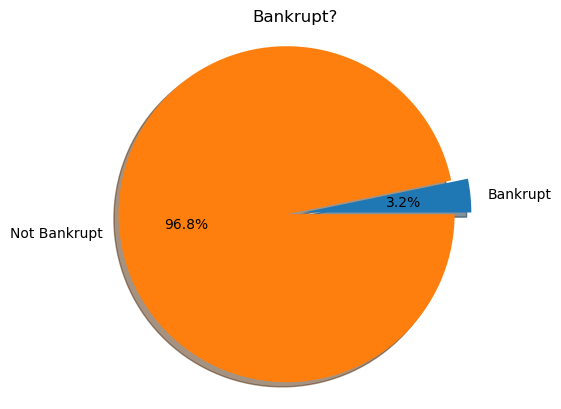

In [5]:
# Checking "Bankrupt?" distributions

labels = 'Bankrupt', 'Not Bankrupt'
sizes = [data['Bankrupt?'].value_counts()[1], data['Bankrupt?'].value_counts()[0]]
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Bankrupt?')
plt.show()

# We can see that the dataset is highly imbalanced.
# We will have to balance the dataset before training the model.
# We will use SMOTE to balance the dataset, to be precise, we will use BorderlineSMOTE.

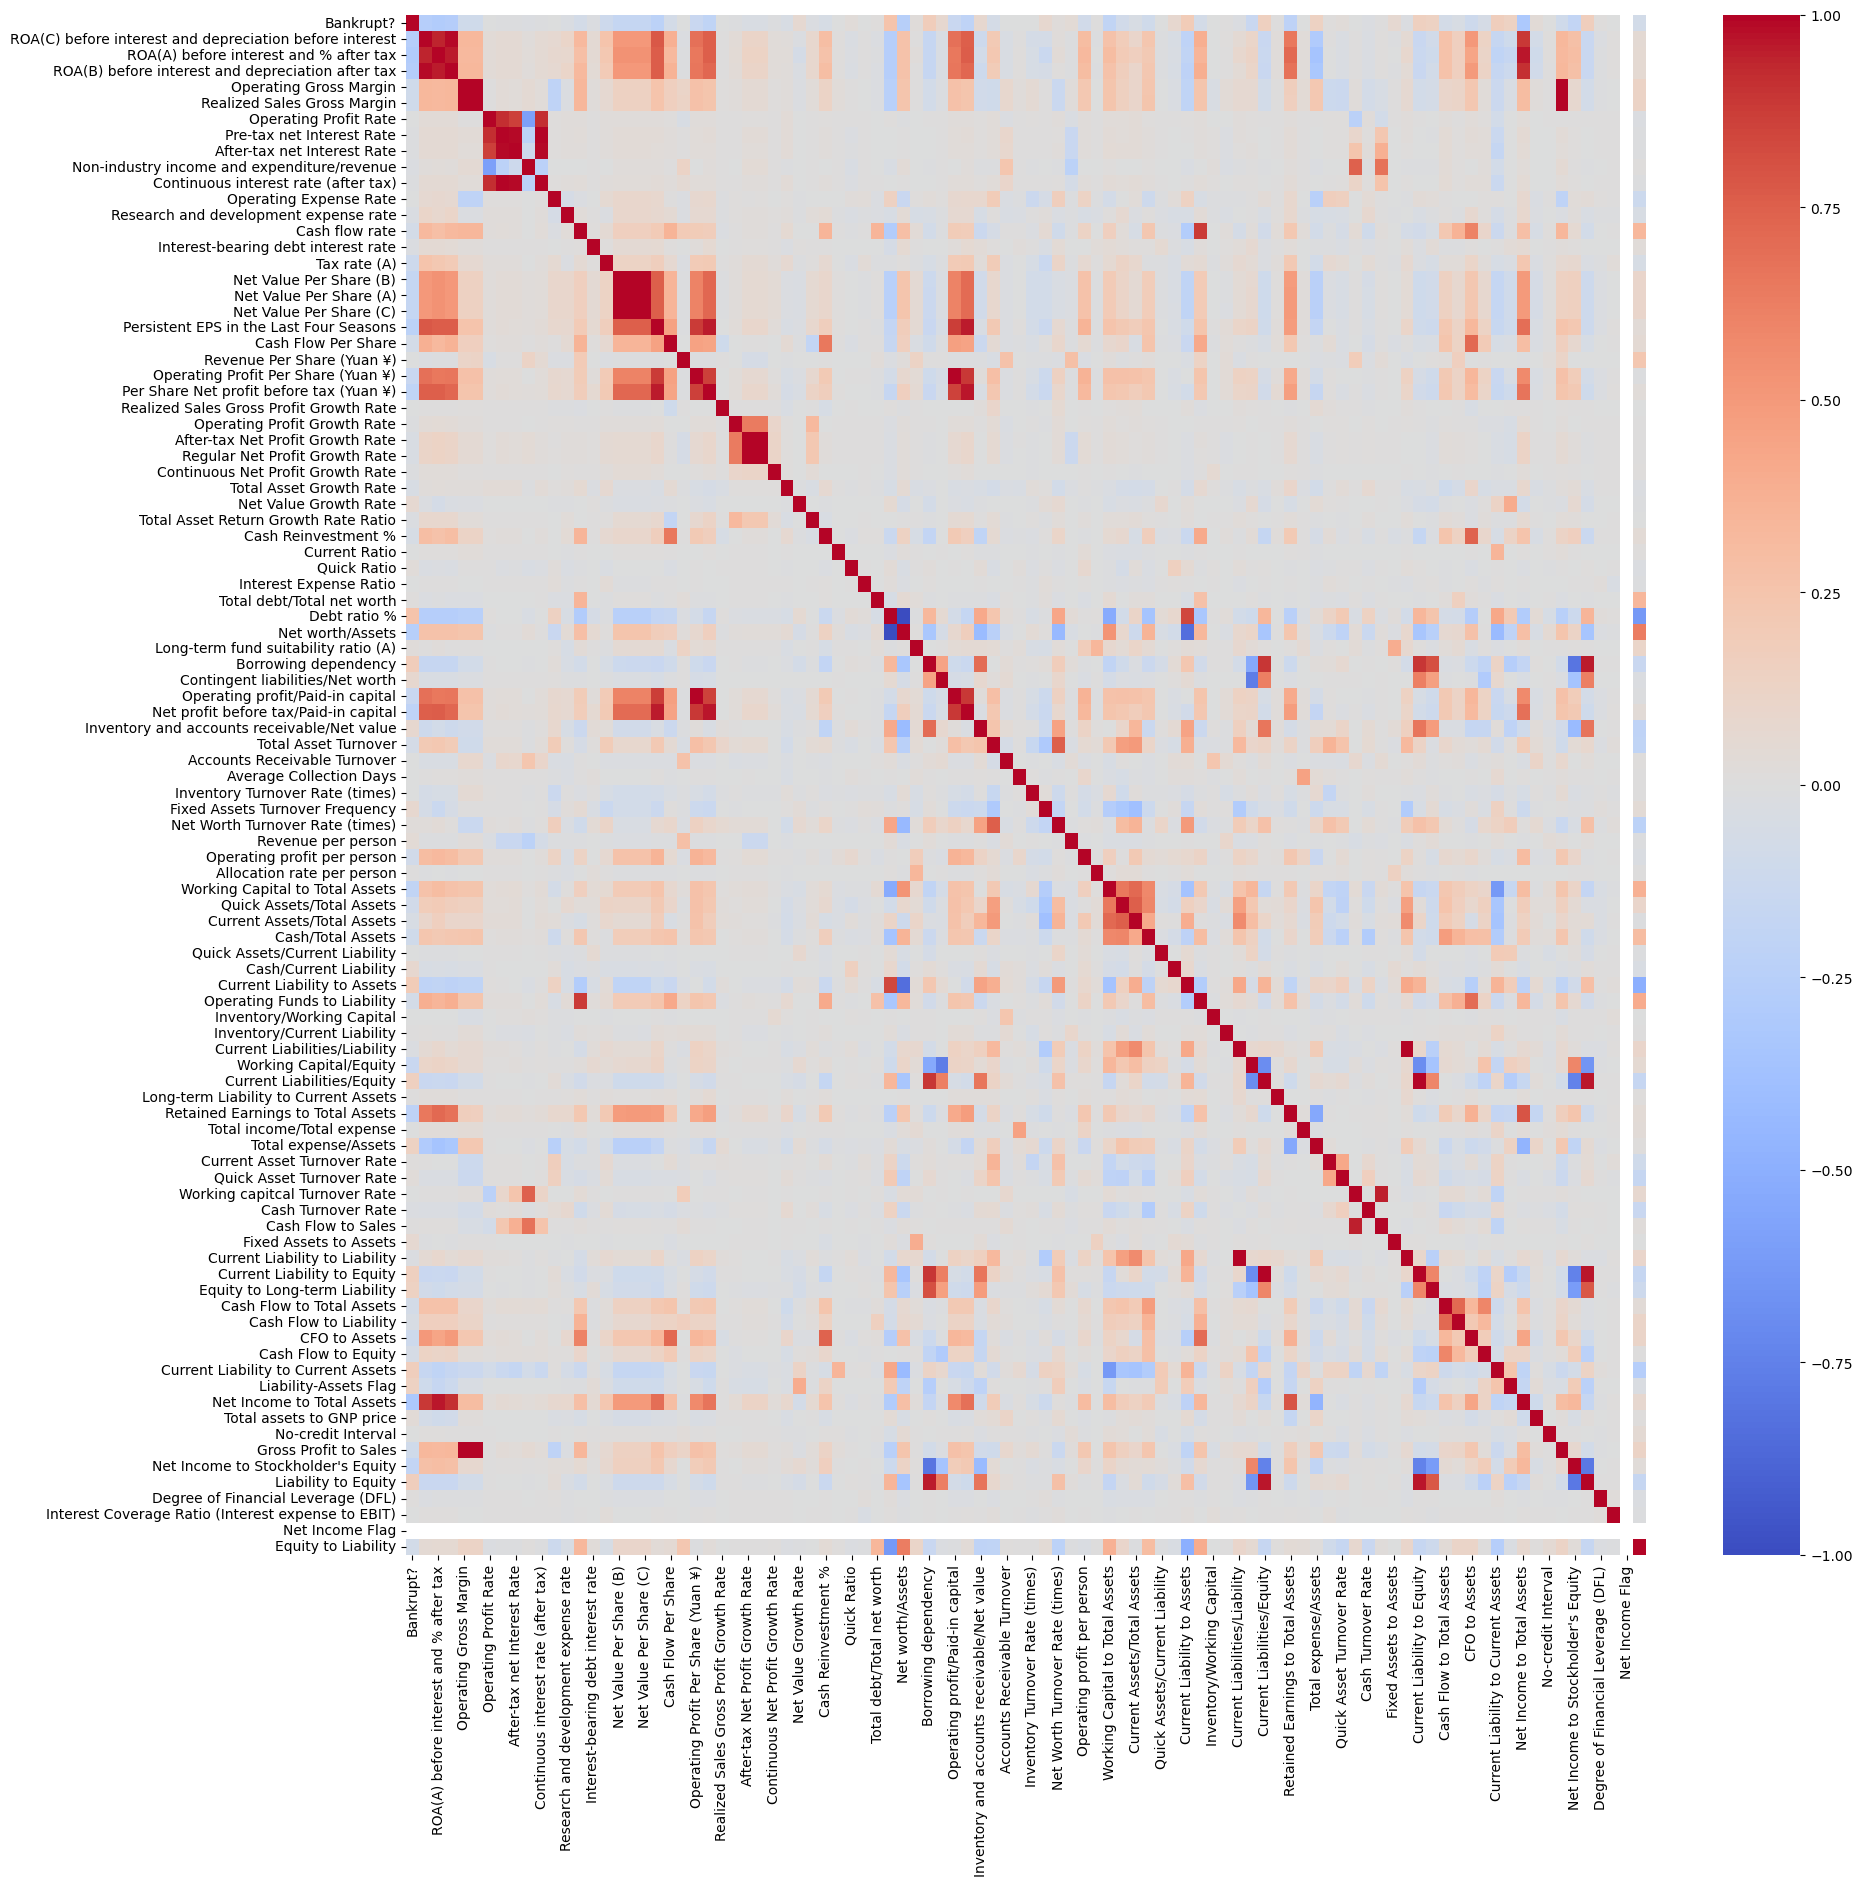

In [6]:
# Correlation matrix

corr = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

# We can see that there are a lot of features that are inter-correlated with each other. 
# We will have to remove these features before training the model.
# We can use PCA or related methods to reduce the number of features while reducing inter-correlation.

<Axes: >

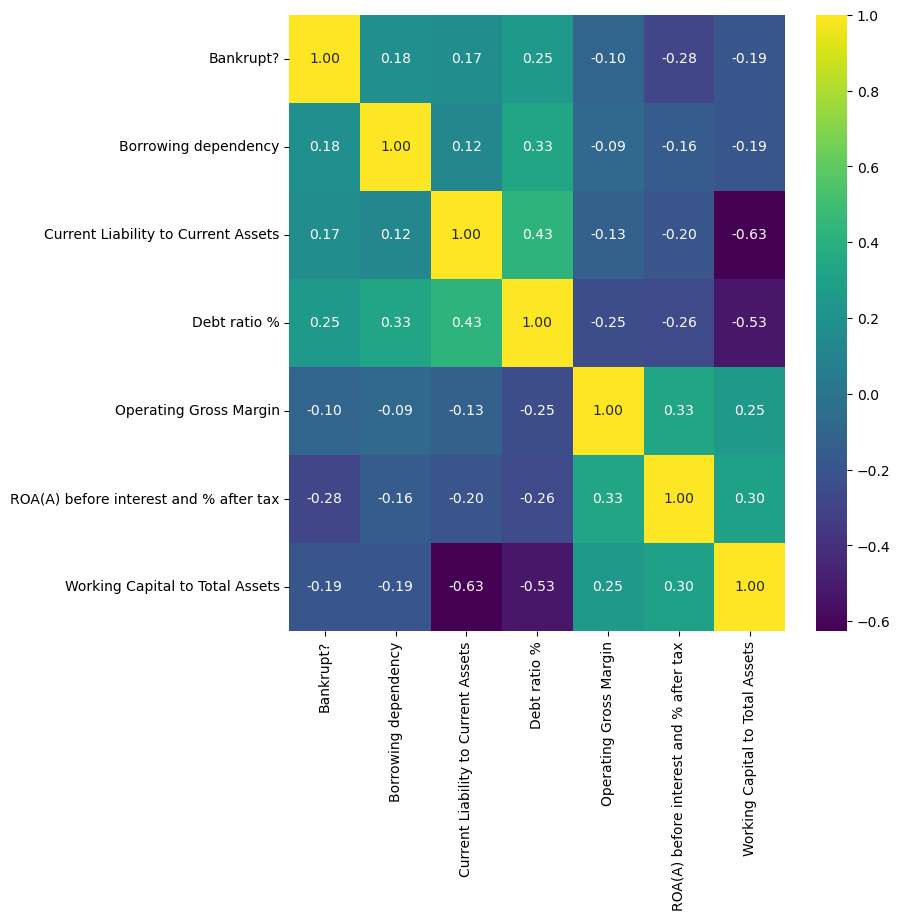

In [8]:
# Smaller correlation matrix


labels = ['Bankrupt?', 'Borrowing dependency', 'Current Liability to Current Assets',
          'Debt ratio %', 'Operating Gross Margin', 'ROA(A) before interest and % after tax',
          'Working Capital to Total Assets']
corr = data[labels].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis')

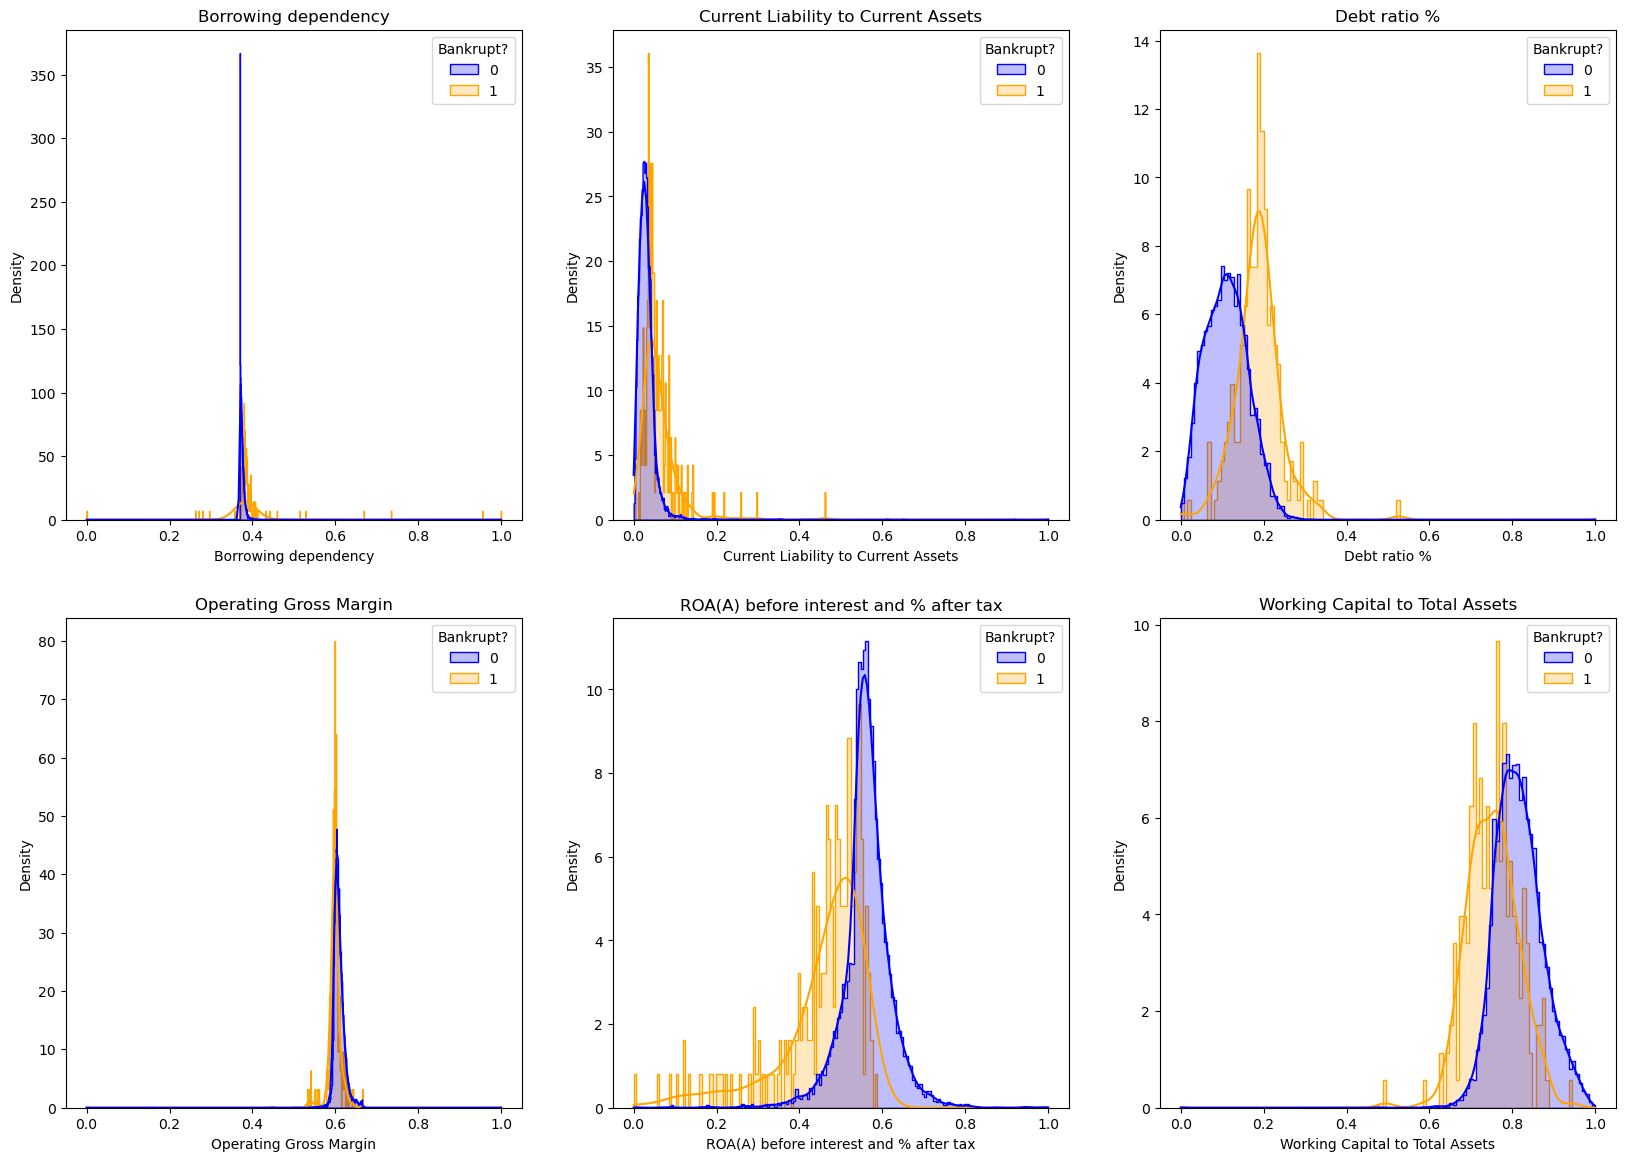

In [9]:
# Distribution of features in the second correlation matrix

plt.figure(figsize=(20, 14))
for i, column in enumerate(labels[1:]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=data, x=column, hue="Bankrupt?", element="step", stat="density", common_norm=False, kde=True, palette={0: "blue", 1: "orange"})
    plt.title(column)

plt.show()

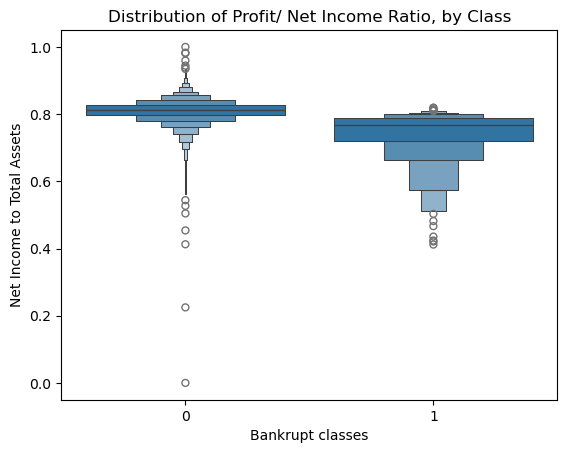

In [10]:
sns.boxenplot(x="Bankrupt?" , y="Net Income to Total Assets" , data=data)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Profit/ Net Income Ratio, by Class");

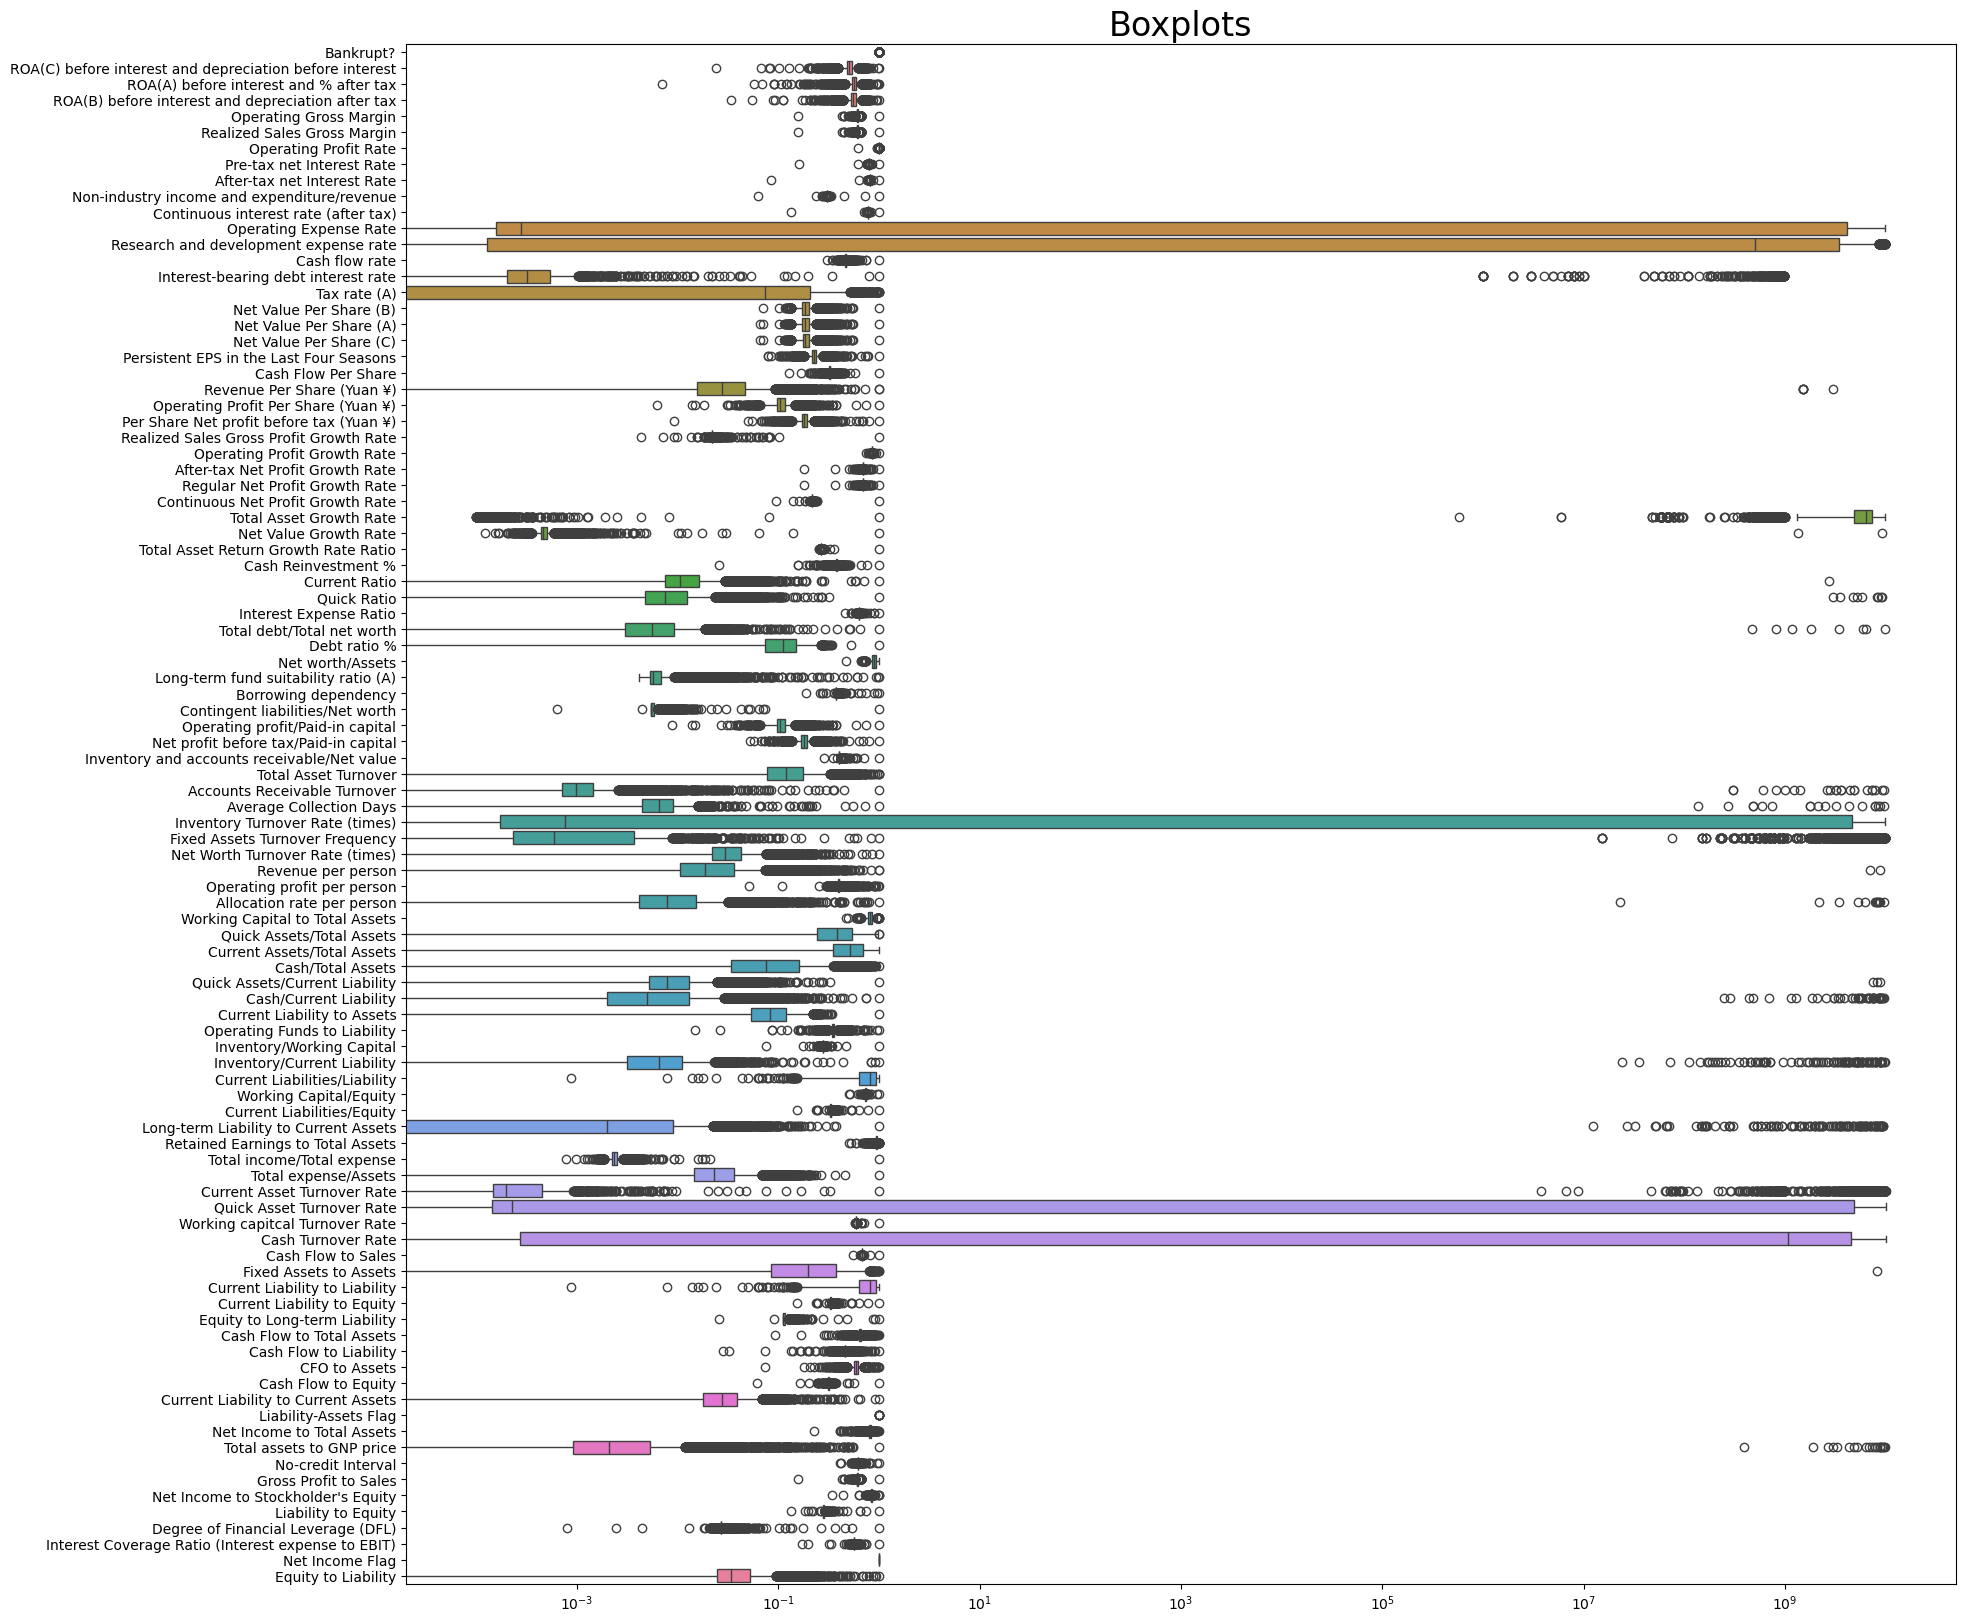

In [11]:
# Boxplot of the features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = data, orient="h")
ax.set_title('Boxplots', fontsize = 24)
ax.set(xscale="log")
plt.show()

# We can see that there are a lot of outliers in the dataset.
# We will have to treat these outliers before training the model.

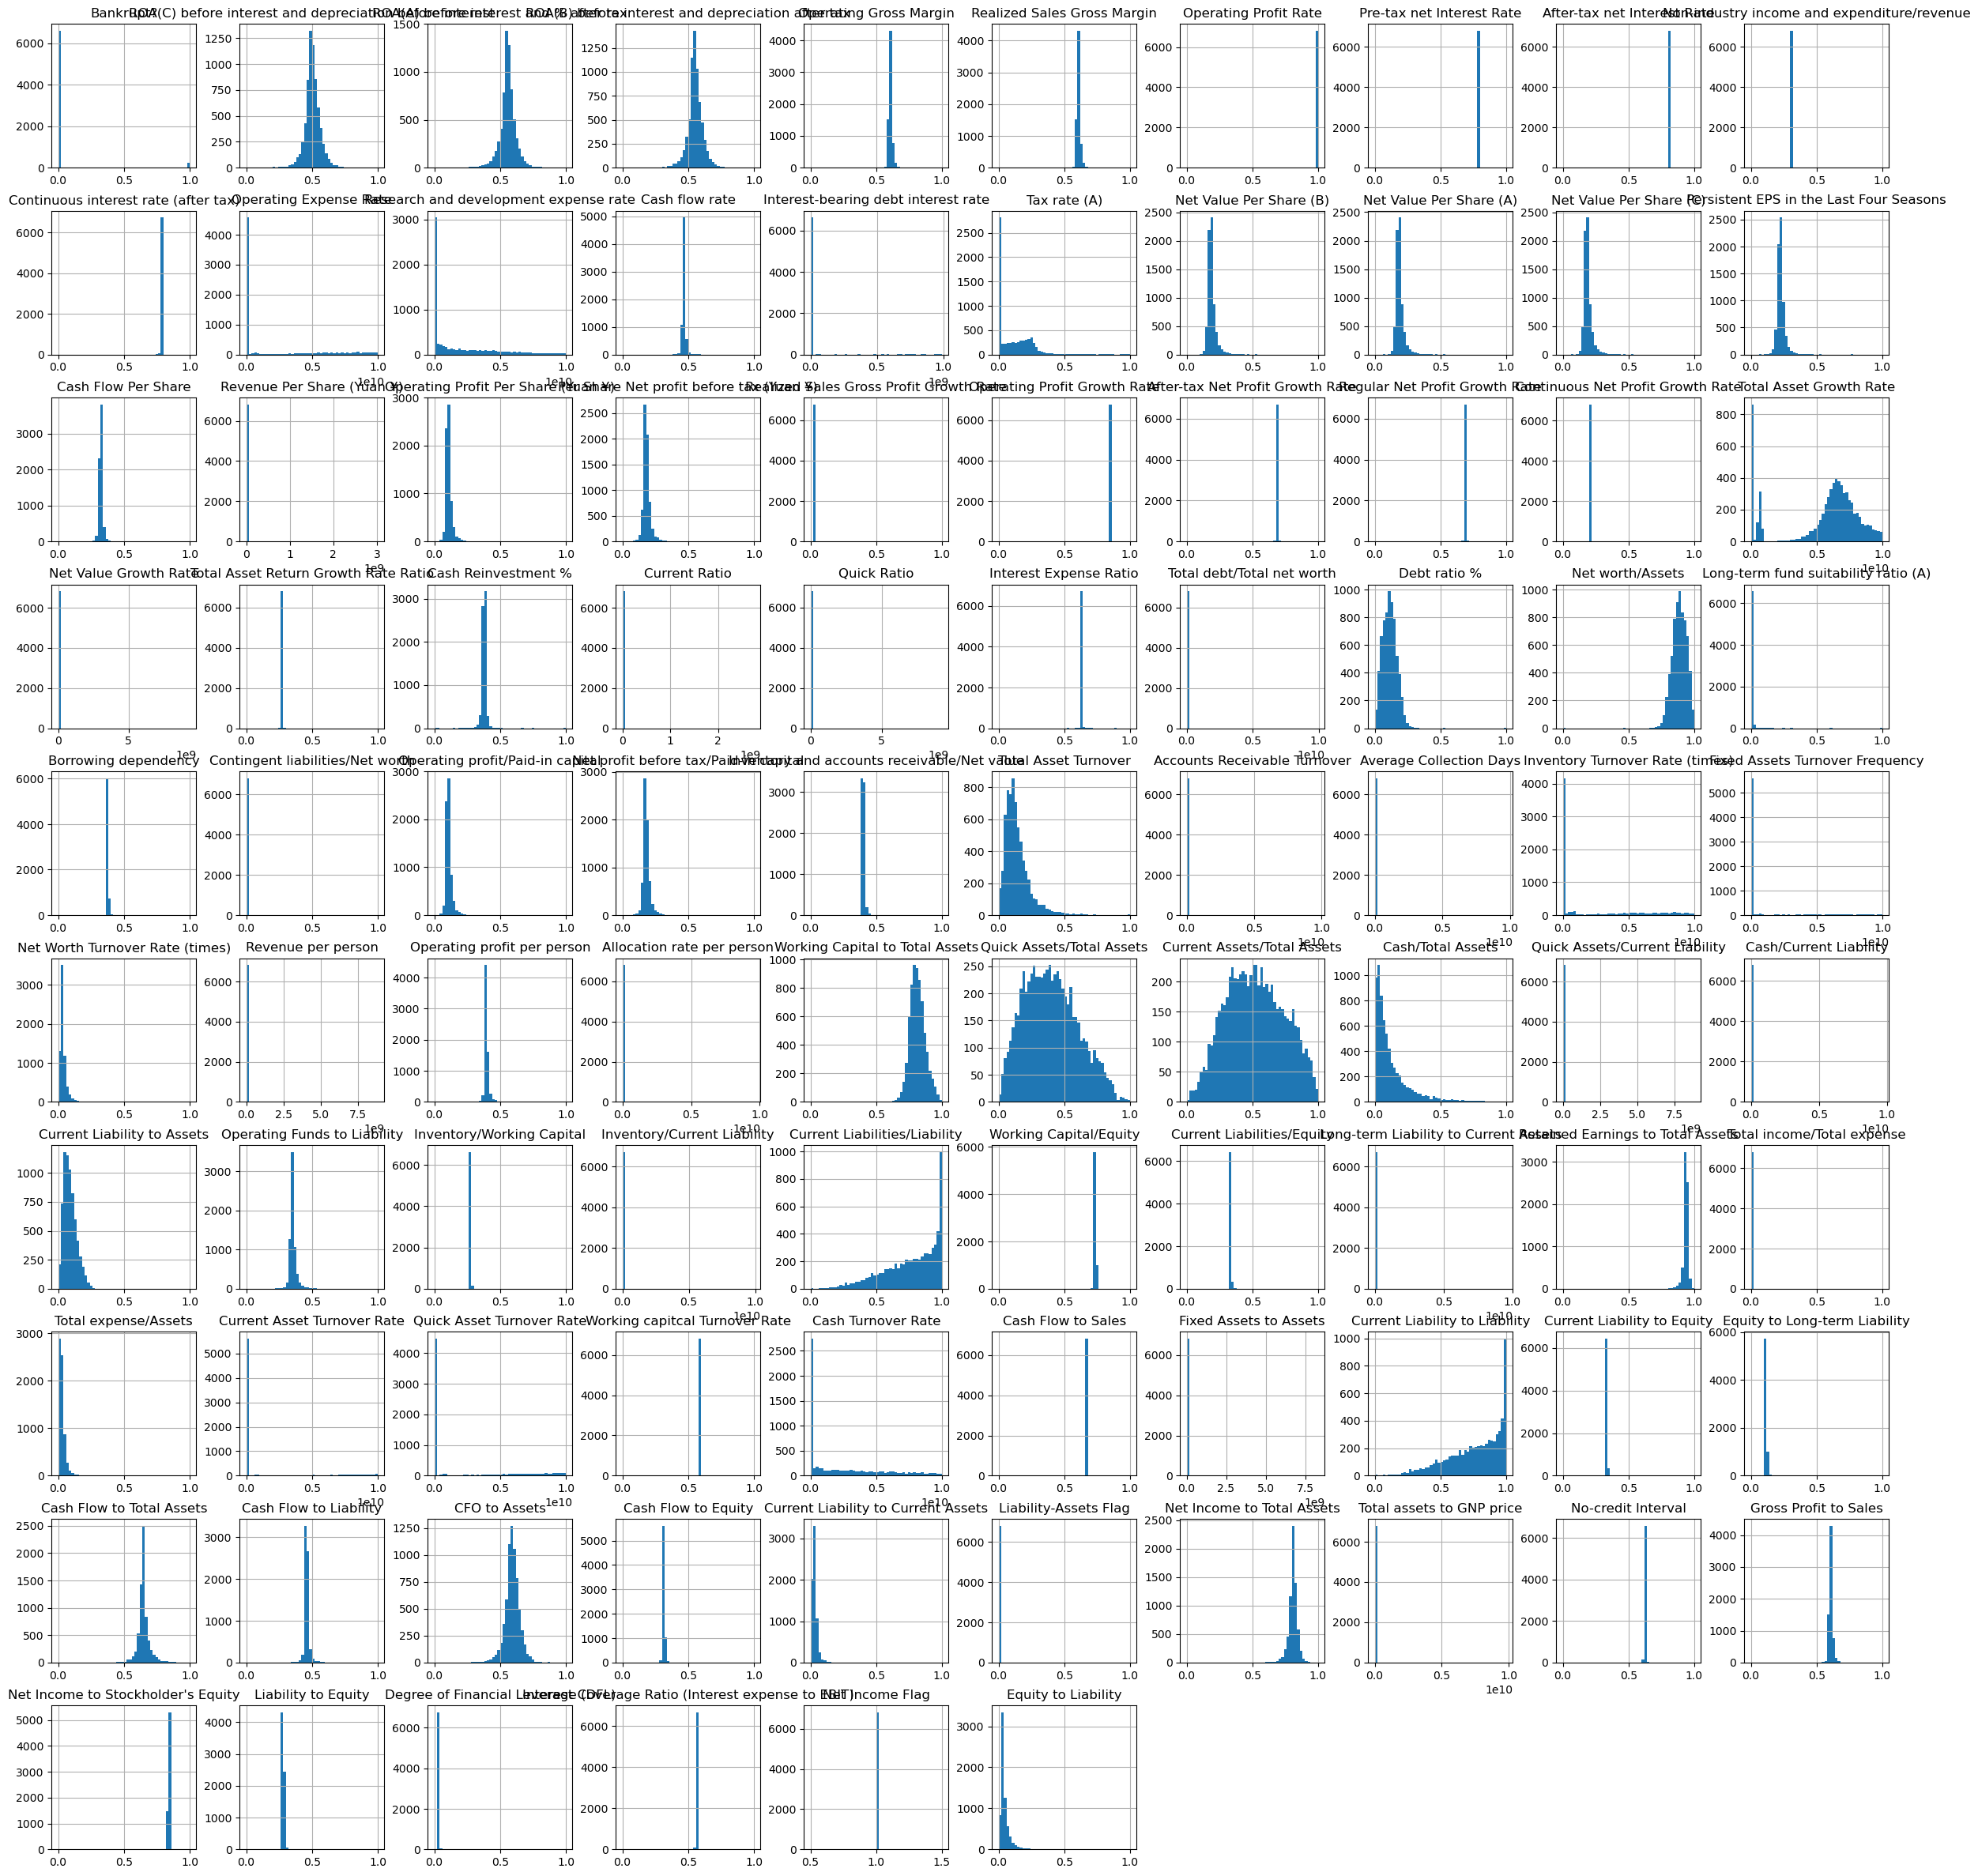

In [12]:
# Distribution of all features

data.hist(figsize = (30,30), bins = 50)
plt.show()

## FEATURE ENGINEERING / DATA PREPROCESSING

In [13]:
# Getting all the column types quantities

data.dtypes.value_counts()
binary_cols = data.select_dtypes(include=['int64']).columns.tolist()
discrete_cols = data.select_dtypes(include=['float64']).columns.tolist()

binary_cols.remove('Bankrupt?')

print("Categorical columns:", len(binary_cols))
print("Numerical columns:", len(discrete_cols))

Categorical columns: 2
Numerical columns: 93


In [15]:
# Treating outliers
# We will use the IQR method to treat outliers
# Any value that is below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR will be considered an outlier
# An outlier will be replaced by the treshold value (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR)

def outlier_thresholds(dataframe, variable, low_quantile=0.15, up_quantile=0.85):
    low_value = dataframe[variable].quantile(low_quantile)
    high_value = dataframe[variable].quantile(up_quantile)
    IQR = high_value - low_value
    up_limit = high_value + 1.5 * IQR
    low_limit = low_value - 1.5 * IQR
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in discrete_cols:
      col, replace_with_thresholds(data, col)

In [16]:
pipeline = Pipeline(steps=[
    ('constant',DropConstantFeatures()),
    ('correlated',DropCorrelatedFeatures()),
    ('duplicate',DropDuplicateFeatures())
])

X = data.drop('Bankrupt?',axis=1)
before_shape = X.shape
y = data['Bankrupt?']

X = pipeline.fit_transform(X)
after_shape = X.shape

print("Number of features before feature selection:", before_shape[1])
print("Number of features after feature selection:", after_shape[1])

# We can see that the number of features has been reduced from 96 to 54 already.

# Balancing the dataset
# We will use BorderlineSMOTE to balance the dataset

smote = BorderlineSMOTE()
X, y = smote.fit_resample(X, y)
print("Final dimensions of target label classes:", Counter(y))

# We can see that the dataset is now balanced, equal number of Bankrupt and Non-Bankrupt companies.

# We will use PCA to reduce the number of features even further.

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
pca = PCA(n_components=29,random_state=0) # We will use 29 components to explain 90% of the variance

scaled_train_X = scaler.fit_transform(X_train)
train_pca = pca.fit_transform(scaled_train_X)
print("Explained variance ratio:", sum(pca.explained_variance_ratio_))

scaled_test_X = scaler.transform(X_test)
test_pca = pca.transform(scaled_test_X)

print("Number of NaN values in the PCA components:", np.isnan(train_pca).sum())

# We can see that there are no NaN values in the PCA components with cbrt transformation

Number of features before feature selection: 95
Number of features after feature selection: 54
Final dimensions of target label classes: Counter({1: 6599, 0: 6599})
Explained variance ratio: 0.9065861780523935
Number of NaN values in the PCA components: 0


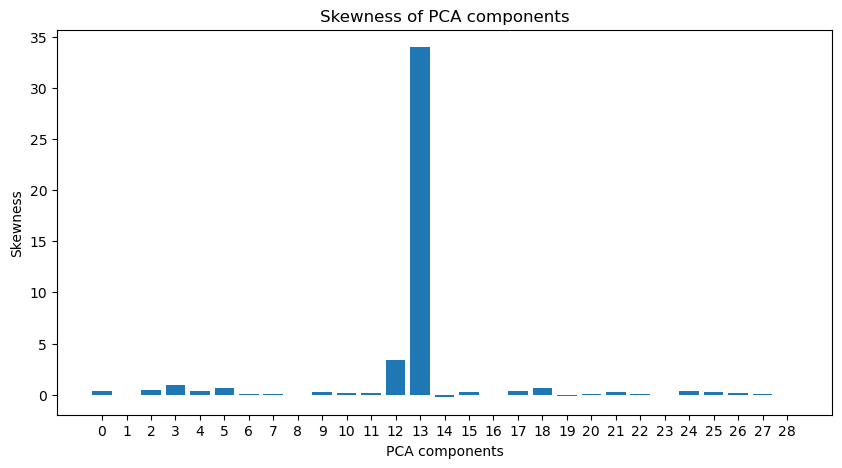

Number of negative values in the PCA components: 155847


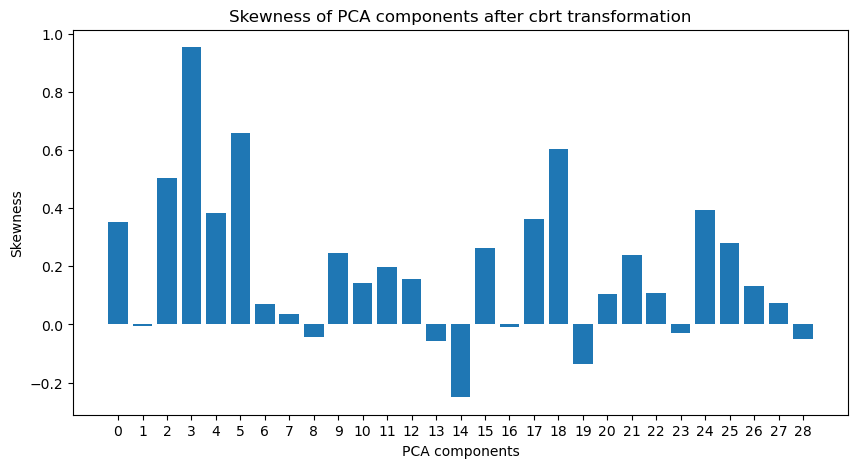

In [17]:
# Checking the skewness of the PCA components

# Plotting the skewness of the PCA components
skewnesses = [skew(train_pca[:,i]) for i in range(train_pca.shape[1])]
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(skewnesses)), skewnesses)
plt.xticks(np.arange(len(skewnesses)))
plt.xlabel("PCA components")
plt.ylabel("Skewness")
plt.title("Skewness of PCA components")
plt.show()

# Check all values are positive

print("Number of negative values in the PCA components:", (train_pca < 0).sum())

# If the skewness is between -1 and 1, the data are fairly symmetrical
# Else will apply cbrt transformation to the data, as we have negative values

for i in range(train_pca.shape[1]):
    if skew(train_pca[:,i]) > 1 or skew(train_pca[:,i]) < -1:
        train_pca[:,i] = np.cbrt(train_pca[:,i])

skewnesses = [skew(train_pca[:,i]) for i in range(train_pca.shape[1])]
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(skewnesses)), skewnesses)
plt.xticks(np.arange(len(skewnesses)))
plt.xlabel("PCA components")
plt.ylabel("Skewness")
plt.title("Skewness of PCA components after cbrt transformation")
plt.show()

# We can see that the skewness of the PCA components is very low.
# We will not have to treat the skewness of the PCA components.

In [18]:
# Check NaN values in the PCA components
print("Number of NaN values in the PCA components:", np.isnan(train_pca).sum())

Number of NaN values in the PCA components: 0


In [19]:
results = pd.DataFrame(columns=['Models','Accuracy','Precision','Recall','F1 Score','ROC AUC Score'])

def train_and_evaluate_model(model, name=None):
    model.fit(train_pca,y_train)
    y_pred = model.predict(test_pca)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    if not name:
        model_name = model.__class__.__name__
    else:
        model_name = name
    global results
    results = pd.concat([results,pd.DataFrame([[model_name,accuracy,precision,recall,f1score,roc_auc]],columns=['Models','Accuracy','Precision','Recall','F1 Score','ROC AUC Score'])],axis=0)

In [23]:
# Train and evaluate all common models
# Store results in a dataframe for comparison

# Empty results dataframe
results = pd.DataFrame(columns=['Models','Accuracy','Precision','Recall','F1 Score','ROC AUC Score'])

train_and_evaluate_model(LogisticRegression())
rf_tuned = RandomForestClassifier(max_features=3, n_estimators=500, min_samples_split=2, random_state=42)
train_and_evaluate_model(rf_tuned) # Hyperparameters are tuned from GridSearchCV
train_and_evaluate_model(RandomForestClassifier(criterion='gini'), name='Random Forest Gini')
train_and_evaluate_model(SVC())
train_and_evaluate_model(KNeighborsClassifier())
train_and_evaluate_model(DecisionTreeClassifier())
xgb_tuned = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=9, subsample=0.8)
train_and_evaluate_model(xgb_tuned) # Hyperparameters are tuned from GridSearchCV
train_and_evaluate_model(CatBoostClassifier(silent=True))
train_and_evaluate_model(LGBMClassifier(silent=True))
stack = StackingClassifier(estimators=[
    ('ET',ExtraTreesClassifier()),
    ('XGB',XGBClassifier()),
    ('CAT',CatBoostClassifier(silent=True))
],final_estimator=RandomForestClassifier(),verbose=2)
train_and_evaluate_model(stack)

# Sort results by F1 Score
results.sort_values(by='F1 Score',ascending=False,inplace=True)
results.head(10)

# We can see that the "classic" best model is the RFT Classifier with a F1 Score of 0.985.
# We can see that, in general, the models have performed very well.
# Tree based models have performed better than the other models.

# The best overall model is the Stacking Classifier with a F1 Score of 0.991-3 (randomness).

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 5228, number of negative: 5330
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 10558, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495170 -> initscore=-0.019322
[LightGBM] [Info] Start training from score -0.019322
[LightGBM] [Warning] Unknown parameter: silent


,Models,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,StackingClassifier,0.990530,0.995582,0.986142,0.990839,0.990707
0,RandomForestClassifier,0.988258,0.987627,0.989788,0.988707,0.988196
0,Random Forest Gini,0.987121,0.986182,0.989059,0.987618,0.987043
0,XGBClassifier,0.984848,0.977746,0.993435,0.985528,0.984503
0,SVC,0.980303,0.972083,0.990518,0.981214,0.979893
0,CatBoostClassifier,0.979924,0.970043,0.991977,0.980887,0.979440
0,LGBMClassifier,0.979167,0.967994,0.992706,0.980194,0.978623
0,KNeighborsClassifier,0.959470,0.930518,0.996353,0.962311,0.957987
0,DecisionTreeClassifier,0.955682,0.945312,0.970824,0.957899,0.955073
0,LogisticRegression,0.921591,0.917504,0.932896,0.925136,0.921137


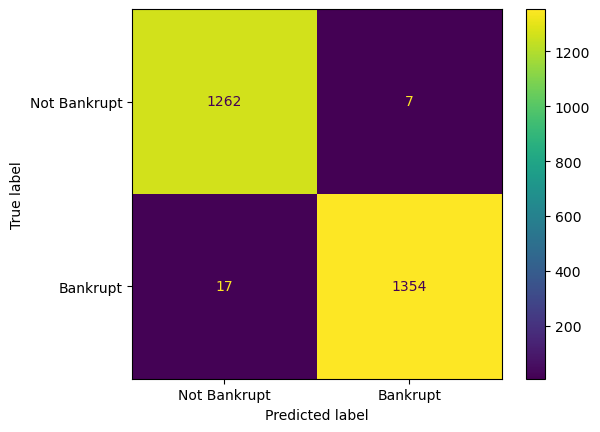

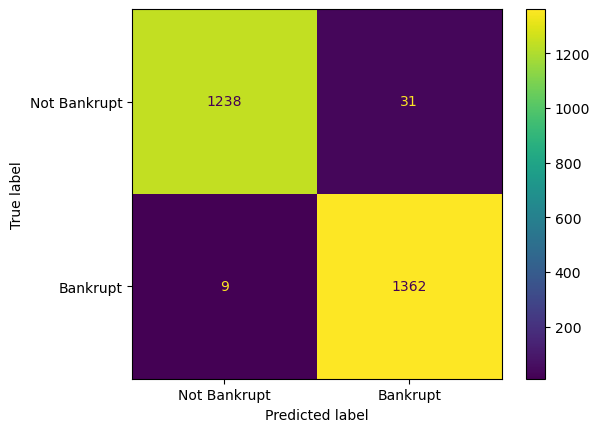

In [21]:
# Confusion matrix of the best model

y_pred = stack.predict(test_pca)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Bankrupt','Bankrupt'])
disp.plot() 


# Confusion matrix of the XGB Classifier

y_pred = xgb_tuned.predict(test_pca)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Bankrupt','Bankrupt'])
disp.plot()

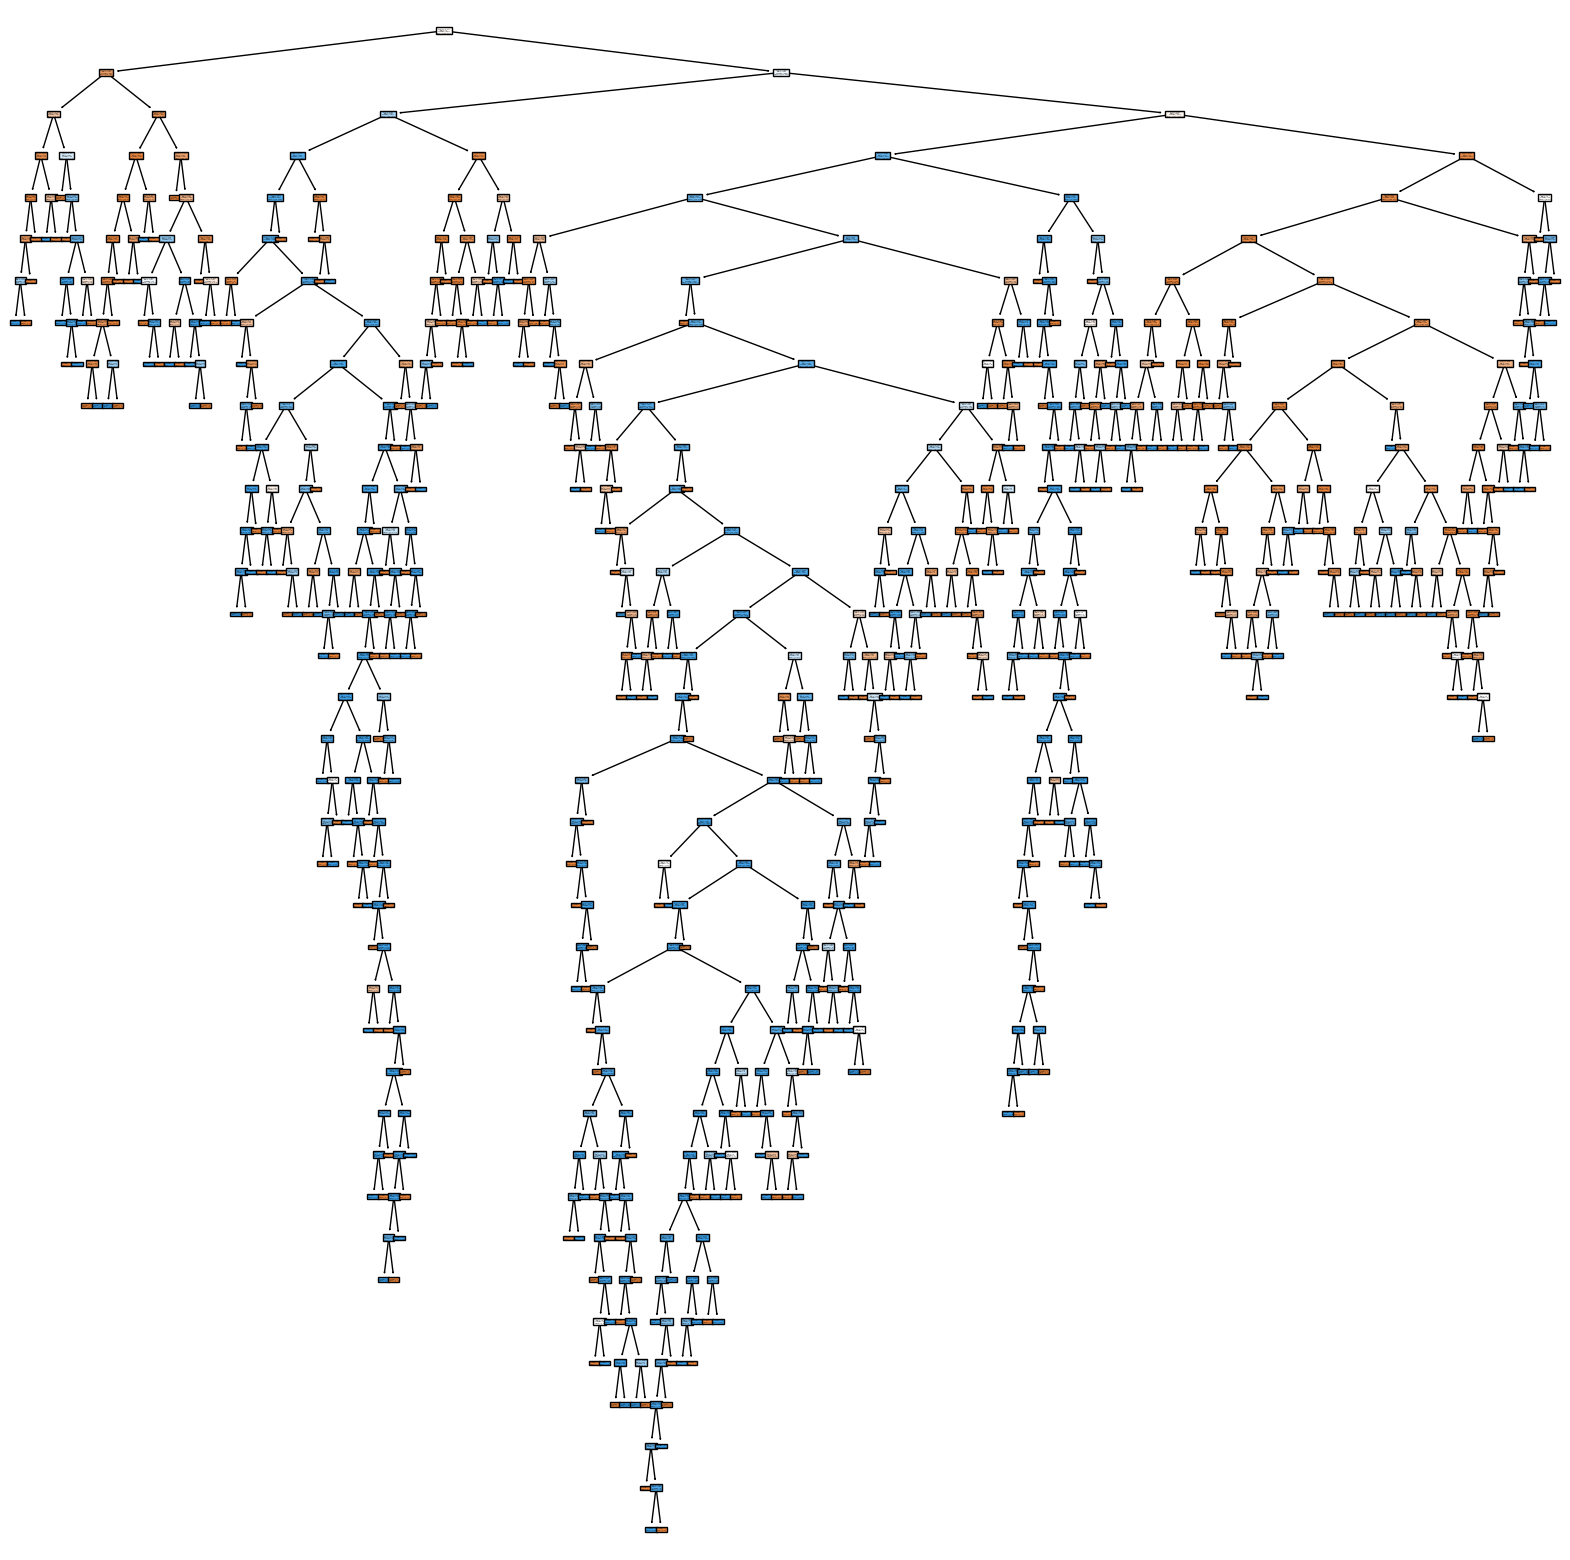

In [22]:
# Tree of the Random Forest Tree Classifier

from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(rf_tuned.estimators_[0],filled=True)
plt.show()

# We can see that the Random Forest Tree Classifier has a lot of depth.

### You can run the "long" snippets below, if you want (they take a while to run and are not necessary for the model to run). The code is in the "code snippets" notebook.